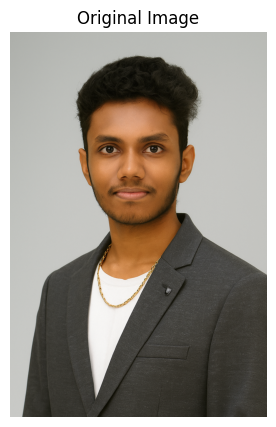

In [9]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image
img = cv2.imread(r"C:\Users\gowri\OneDrive\Desktop\propic\Image.png")

# Step 2: Check if the image was loaded
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Step 3: Show the image
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')


In [11]:
# Step 3: Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
# Step 4: Apply median blur
gray_blur = cv2.medianBlur(gray, 5)

In [15]:
# Step 5: Detect edges
edges = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY,
                              blockSize=9, C=9)

In [17]:
# Step 6: Apply bilateral filter to smooth colors
color = cv2.bilateralFilter(img, d=9, sigmaColor=250, sigmaSpace=250)

In [19]:
# Step 7: Combine edges with color image
cartoon = cv2.bitwise_and(color, color, mask=edges)

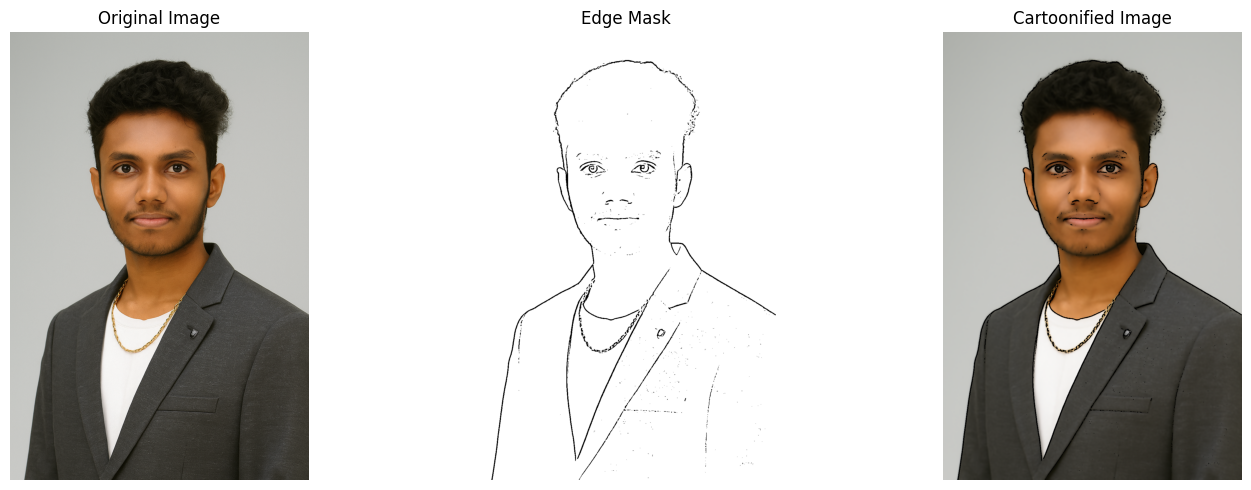

True

In [21]:
# Step 8: Convert BGR to RGB for correct color display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color_rgb = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)
cartoon_rgb = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)

# Step 9: Display all images inline using matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cartoon_rgb)
plt.title('Cartoonified Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 10: Save the cartoon image
cv2.imwrite("cartoon_output.jpg", cartoon)